In [1]:
import numpy as np
import pymesh
from glob import glob
from sklearn import preprocessing
import math
import pandas as pd
import matplotlib.pyplot as plt
import re

In [2]:
fs_mesh = np.array(sorted(glob("./out/torsos_smooth/*.ply")))

In [3]:
#ids = ["002","004","001","005","006","009","010","011","012","013","015","016","017","018","019","020","021","024","025","026","028","030","033","034","035","036","038","039","041","042","043","044","045","046","047","048","049","050","051","052","053","054","055","056","058","059","061","062","063","064","065","067","069","070","071","073","074","075","076","078","079","080","081","082","084","085","086","087","088","089","090","091","092","094","097","098","100","101","103","104","105","106","107","108","110","112","113","114","115","117","118","120","121","122","123","124","125","127","128","130","135","136","137","138","139","141","142","143","145","146","147","148","149","150","151","153","154"]
#import re
#ids = map(lambda x: re.findall(r'\d+',x)[0] ,fs_mesh)
ids = []

In [4]:
len(ids)

0

In [5]:
def distance2D(a, b):
    return math.sqrt( ((b[0]-a[0])**2)  + ((b[1]-a[1])**2) )

In [6]:
fetas =[]
for mesh_f in fs_mesh[:]:
    print mesh_f
    if mesh_f == "./out/torsos_smooth/model_mesh_067.ply" or mesh_f == "./out/torsos_smooth/model_mesh_062.ply" or mesh_f == "./out/torsos_smooth/model_mesh_076.ply" or mesh_f == "./out/torsos_smooth/model_mesh_108.ply" or  mesh_f == "./out/torsos_smooth/model_mesh_149.ply":
        print("omitido")
        continue
        
    ids.append(re.findall(r'\d+',mesh_f)[0])
    fetas_i = [str(i)+"-feta-"+mesh_f.split("/")[-1]+".ply" for i in range(0,251)]
    #mesh_torso = pymesh.load_mesh(mesh_f) 
    medidas = []
    fetas_i.reverse()
    for f in fetas_i:
        mesh = pymesh.load_mesh("./out_energy/landmarks/fetas/"+f)
        #print "./out/fetas_reales/"+f
        #output_mesh = pymesh.boolean(mesh_torso, mesh, operation="intersection",engine="auto")
        vertexs_2d = np.delete(mesh.vertices, [1], axis=1)
        #del(mesh)
        medidas.append(vertexs_2d)
    fetas.append(medidas)
        #print(aux)

./out/torsos_smooth/model_mesh_001.ply
./out/torsos_smooth/model_mesh_002.ply
./out/torsos_smooth/model_mesh_004.ply
./out/torsos_smooth/model_mesh_005.ply
./out/torsos_smooth/model_mesh_006.ply
./out/torsos_smooth/model_mesh_009.ply
./out/torsos_smooth/model_mesh_010.ply
./out/torsos_smooth/model_mesh_011.ply
./out/torsos_smooth/model_mesh_012.ply
./out/torsos_smooth/model_mesh_013.ply
./out/torsos_smooth/model_mesh_015.ply
./out/torsos_smooth/model_mesh_016.ply
./out/torsos_smooth/model_mesh_017.ply
./out/torsos_smooth/model_mesh_018.ply
./out/torsos_smooth/model_mesh_019.ply
./out/torsos_smooth/model_mesh_020.ply
./out/torsos_smooth/model_mesh_021.ply
./out/torsos_smooth/model_mesh_024.ply
./out/torsos_smooth/model_mesh_025.ply
./out/torsos_smooth/model_mesh_026.ply
./out/torsos_smooth/model_mesh_028.ply
./out/torsos_smooth/model_mesh_030.ply
./out/torsos_smooth/model_mesh_033.ply
./out/torsos_smooth/model_mesh_034.ply
./out/torsos_smooth/model_mesh_035.ply
./out/torsos_smooth/model

In [7]:
np.shape(fetas)

(112, 251)

In [8]:
def lin_refine_implicit(x, n):
    """
    Given a 2D ndarray (npt, m) of npt coordinates in m dimension, insert 2**(n-1) additional points on each trajectory segment
    Returns an (npt*2**(n-1), m) ndarray
    """
    if n > 1:
        m = 0.5*(x[:-1] + x[1:])
        if x.ndim == 2:
            msize = (x.shape[0] + m.shape[0], x.shape[1])
        else:
            raise NotImplementedError

        x_new = np.empty(msize, dtype=x.dtype)
        x_new[0::2] = x
        x_new[1::2] = m
        return lin_refine_implicit(x_new, n-1)
    elif n == 1:
        return x
    else:
        raise ValueError


In [9]:
indi_values = []
temp_vertex = []
for i in fetas[:]:
    values = []
    for j in i:
        vertexs_2d = j
        mx = np.mean(vertexs_2d[:,0])
        my = np.mean(vertexs_2d[:,1])
        vertexs_2d = np.array(sorted(vertexs_2d, key=lambda x : (math.atan2(x[0] - mx, x[1] - my) + 2 * math.pi) % (2*math.pi)))
        xy = np.vstack((vertexs_2d[:,0], vertexs_2d[:,1])).T
        xy_highres_lin = lin_refine_implicit(xy, n=3)
        n=2712
        xy= xy.flatten()
        xy_highres_lin= xy_highres_lin.flatten()
        zro = np.zeros(n)
        zro[:xy.shape[0]] = xy
        zro = zro.reshape((zro.shape[0]/2,2))
        xy_highres_lin = xy_highres_lin.reshape((xy_highres_lin.shape[0]/2,2))
        zro[xy.shape[0]/2:n/2] = xy_highres_lin[np.random.randint(xy_highres_lin.shape[0],size=abs(n/2 - xy.shape[0]/2))]
        mx = np.mean(zro[:,0])
        my = np.mean(zro[:,1])
        vertexs_2d = np.array(sorted(zro, key=lambda x : (math.atan2(x[0] - mx, x[1] - my) + 2 * math.pi) % (2*math.pi)))
        temp_vertex.append(vertexs_2d)
        values.append(np.array(vertexs_2d).flatten())
    indi_values.append(np.array(values).flatten())

In [10]:
del(fetas)

In [11]:
np.shape(indi_values)

(112, 680712)

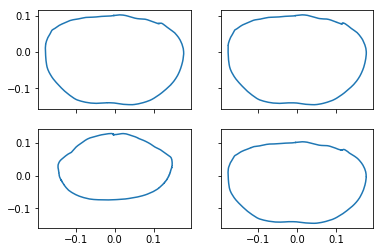

In [12]:
f, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, sharex='col', sharey='row')
ax1.plot(temp_vertex[0][:,0],temp_vertex[0][:,1],"-")

ax2.plot(temp_vertex[1][:,0],temp_vertex[1][:,1],"-")

ax3.plot(temp_vertex[-1][:,0],temp_vertex[-1][:,1],"-")

ax4.plot(temp_vertex[3][:,0],temp_vertex[3][:,1],"-")

plt.show()

In [13]:
fetas_outl = np.array(indi_values)

In [14]:
del indi_values

In [15]:
fetas_outl.shape

(112, 680712)

In [16]:
p = fetas_outl.reshape(112,fetas_outl.shape[1]/2,2)

In [17]:
del fetas_outl

In [18]:
p.shape

(112, 340356, 2)

In [19]:
from scipy.spatial import procrustes

In [20]:
pcentro = p.mean(0)

In [21]:
procrusteados = []
for p1 in p:
    mtx1,mtx2, disparity = procrustes(pcentro,p1)
    procrusteados.append(mtx2)
    #print(round(disparity))

In [22]:
np.shape(procrusteados)

(112, 340356, 2)

In [23]:
p = procrusteados[6]

In [24]:
del p

In [25]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

In [ ]:
#ids = ["002","004","001","005","006","009","010","011","012","013","015","016","017","018","019","020","021","024","025","026","028","030","033","034","035","036","038","039","041","042","043","044","045","046","047","048","049","050","051","052","053","054","055","056","058","059","061","062","063","064","065","067","069","070","071","073","074","075","076","078","079","080","081","082","084","085","086","087","088","089","090","091","092","094","097","098","100","101","103","104","105","106","107","108","110","112","113","114","115","117","118","120","121","122","123","124","125","127","128","130","135","136","137","138","139","141","142","143","145","146","147","148","149","150","151","153","154"]
#ids = ["002","004","001","005","006","009","010","011","012","013","015","016","017","018","019","020","021","024","025","026","028","030","033","034","035","036","038","039","041","042","043","044","045","046","047","048","049","050","051","052","053","054","055","056","058","059","061","063","064","065","067","069","070","071","073","074","075","078","079","080","081","082","084","085","086","087","088","089","090","091","092","094","097","098","100","101","103","104","105","106","107","110","112","113","114","115","117","118","120","121","122","123","124","125","127","128","130","135","136","137","138","139","141","142","143","145","146","147","148","150","151","153","154"]

In [ ]:
import matplotlib.patches as mpatches

f, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, sharex='col', sharey='row')
ax1.plot(procrusteados[0][:,0],procrusteados[0][:,1],"-")
ax1.set_title("id="+ids[0])
ax2.plot(procrusteados[5][:,0],procrusteados[5][:,1],"-")
ax2.set_title("id="+ids[5])
ax3.plot(procrusteados[6][:,0],procrusteados[6][:,1],"-")
ax3.set_title("id="+ids[6])
ax4.plot(procrusteados[-1][:,0],procrusteados[-1][:,1],"-")
ax4.set_title("id="+ids[-1])

# ax1.plot(x, y)
# ax1.set_title('Sharing x per column, y per row')
# ax2.scatter(x, y)
# ax3.scatter(x, 2 * y ** 2 - 1, color='r')
# ax4.plot(x, 2 * y ** 2 - 1, color='r')

#plt.plot(procrusteados[0][:,0],procrusteados[0][:,1],"-")
#plt.plot(procrusteados[5][:,0],procrusteados[5][:,1],"-")
#plt.plot(procrusteados[6][:,0],procrusteados[6][:,1],"-")
plt.show()

In [26]:
fetas_outl = np.array(procrusteados)

In [27]:
del procrusteados

In [28]:
fetas_outl =fetas_outl.reshape(fetas_outl.shape[0],fetas_outl.shape[1]*2)

In [29]:
from sklearn import decomposition

In [30]:
fetas_outl.shape

(112, 680712)

In [ ]:
#ddf = pd.DataFrame(fetas_outl)
#ddf.to_csv("out_energy/fetas_outl.csv")

In [ ]:
#ddf = pd.read_csv("out_energy/fetas_outl.csv")

In [ ]:
#ddf

In [ ]:
decomposition.PCA?

In [31]:
pca = decomposition.PCA(n_components=50,svd_solver='randomized')
pca.fit(fetas_outl)
print "Con n_components = {} el valor es: {} ".format(50,pca.explained_variance_ratio_.sum())

Con n_components = 50 el valor es: 0.823838931405 


In [32]:
x_out = pca.transform(fetas_outl)
x_out.shape

(112, 50)

In [34]:
pca.explained_variance_ratio_

array([ 0.15177382,  0.10923926,  0.06611499,  0.04237175,  0.03049187,
        0.02912871,  0.02422884,  0.0236856 ,  0.01915109,  0.01630604,
        0.01553891,  0.01500377,  0.01444105,  0.01368728,  0.01326407,
        0.01247038,  0.01141757,  0.01056463,  0.01021383,  0.00956693,
        0.00936873,  0.0089574 ,  0.008757  ,  0.00819325,  0.00809222,
        0.00789276,  0.00776861,  0.0073072 ,  0.00717171,  0.00686441,
        0.00645654,  0.00638097,  0.0061624 ,  0.00606467,  0.00595866,
        0.00578799,  0.00570075,  0.00550022,  0.00542283,  0.00528731,
        0.00512689,  0.00508087,  0.00484131,  0.00481978,  0.00470892,
        0.00462553,  0.0043613 ,  0.00431019,  0.00411871,  0.00408945])

In [35]:
del pca

In [36]:
#del fetas_outl

In [37]:
ids_utilizados = map(lambda x: int(x),ids)

In [38]:
data = pd.read_excel("./planilla_colecta.xlsx")
#data = data[data['id'].isin(ids_utilizados)]

In [39]:
data = data[data['id'].isin(ids_utilizados)]

In [40]:
def bmi_cal(bmi):
    if 18.5 > bmi:
        return "underfat"
    if 18.5 <= bmi < 25:
        return "healthy"
    if 25 <= bmi < 30:
        return "overfat"
    if 30 <= bmi:
        return "obese"

In [41]:
sexo = data["sexo"].iloc[:].tolist() 
body_fat_range = data["Body fat range"].iloc[:].tolist() 
peso = data["peso"].iloc[:].tolist() 
altura = data["promedio altura"].iloc[:].tolist() 

In [42]:
altura = np.array(altura)/100

In [43]:
bmis = map( lambda pa: bmi_cal(pa[0] / (pa[1]*pa[1]))  ,zip(peso,altura))

In [44]:
interest_feat = range(10)
data = pd.DataFrame(x_out)
data["labels"]= bmis
color_wheel = {"healthy": "red", "obese": "blue","overfat":"green","underfat":"black","desconocido":"yellow"}
colors = data["labels"].map(lambda x: color_wheel.get(x.lower()))
#pd.scatter_matrix(data.loc[:,interest_feat[:-1]], figsize=(12,8), diagonal='kde',label=data.loc[:,"labels"],c=colors)
#pd.scatter_matrix(data.loc[:,interest_feat[:-1]], figsize=(12,8), diagonal='kde')
#plt.show()

/usr/local/lib/python2.7/dist-packages/matplotlib/axes/_axes.py:545: UserWarning: No labelled objects found. Use label='...' kwarg on individual plots.
  warnings.warn("No labelled objects found. "


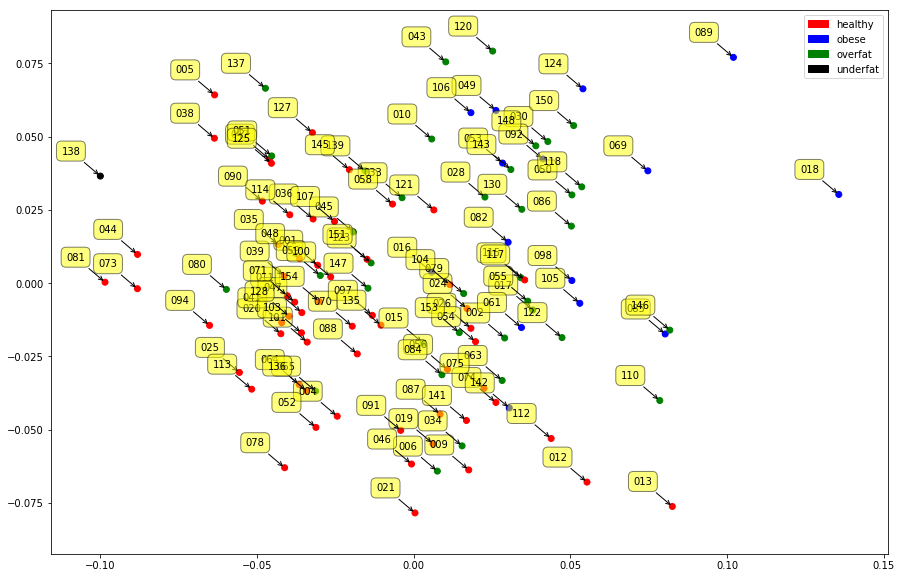

In [45]:
import matplotlib.patches as mpatches
plt.rcParams["figure.figsize"] = [15,10]
fig = plt.figure()
ax = fig.add_subplot(111)
ax.scatter(x_out[:,0],x_out[:,1],c=colors,marker="o")

red_patch = mpatches.Patch(color='red', label='healthy')
green_patch = mpatches.Patch(color='green', label='overfat')
blue_patch = mpatches.Patch(color='blue', label='obese')
black_patch = mpatches.Patch(color='black', label='underfat')
plt.legend(handles=[red_patch,blue_patch,green_patch,black_patch])


#ax.scatter(x_out[:,0],x_out[:,1],marker="o")



# for label, x, y in zip(np.array(ids)[fat_class], x_out[fat_class,7], x_out[fat_class,0]):
#     plt.annotate(
#         label,
#         xy=(x, y), xytext=(-20, 20),
#         textcoords='offset points', ha='right', va='bottom',
#         bbox=dict(boxstyle='round,pad=0.5', fc='yellow', alpha=0.5),
#         arrowprops=dict(arrowstyle = '->', connectionstyle='arc3,rad=0'))
    
# for label, x, y in zip(np.array(ids), x_out[:,0], x_out[:,1]):
#     plt.annotate(
#         label,
#         xy=(x, y), xytext=(-20, 20),
#         textcoords='offset points', ha='right', va='bottom',
#         bbox=dict(boxstyle='round,pad=0.5', fc='yellow', alpha=0.5),
#         arrowprops=dict(arrowstyle = '->', connectionstyle='arc3,rad=0'))

for label, x, y in zip(np.array(sorted(ids)), x_out[:,0], x_out[:,1]):
    plt.annotate(
        label,
        xy=(x, y), xytext=(-20, 20),
        textcoords='offset points', ha='right', va='bottom',
        bbox=dict(boxstyle='round,pad=0.5', fc='yellow', alpha=0.5),
        arrowprops=dict(arrowstyle = '->', connectionstyle='arc3,rad=0'))

plt.legend(loc='best')

plt.show()

In [46]:
sex = {"f":"red","m":"blue"}
sex_label = map(lambda x: sex.get(x[0]),sexo)

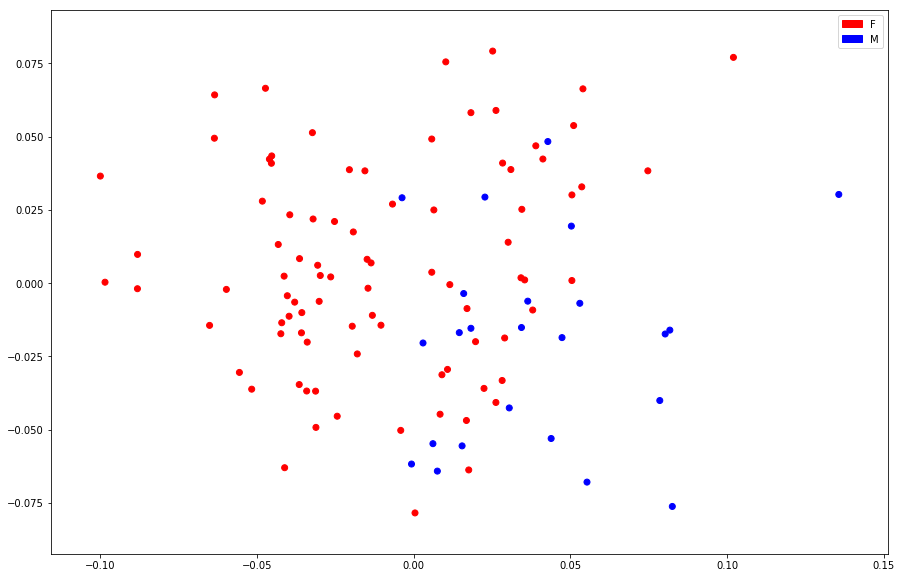

In [47]:
import matplotlib.patches as mpatches
plt.rcParams["figure.figsize"] = [15,10]
fig = plt.figure()
ax = fig.add_subplot(111)
ax.scatter(x_out[:,0],x_out[:,1],c=sex_label,marker="o")

red_patch = mpatches.Patch(color='red', label='F')
#green_patch = mpatches.Patch(color='green', label='overfat')
blue_patch = mpatches.Patch(color='blue', label='M')
#black_patch = mpatches.Patch(color='black', label='underfat')
plt.legend(handles=[red_patch,blue_patch])


#ax.scatter(x_out[:,0],x_out[:,1],marker="o")



# for label, x, y in zip(np.array(ids)[fat_class], x_out[fat_class,7], x_out[fat_class,0]):
#     plt.annotate(
#         label,
#         xy=(x, y), xytext=(-20, 20),
#         textcoords='offset points', ha='right', va='bottom',
#         bbox=dict(boxstyle='round,pad=0.5', fc='yellow', alpha=0.5),
#         arrowprops=dict(arrowstyle = '->', connectionstyle='arc3,rad=0'))
    
# for label, x, y in zip(np.array(ids), x_out[:,0], x_out[:,1]):
#     plt.annotate(
#         label,
#         xy=(x, y), xytext=(-20, 20),
#         textcoords='offset points', ha='right', va='bottom',
#         bbox=dict(boxstyle='round,pad=0.5', fc='yellow', alpha=0.5),
#         arrowprops=dict(arrowstyle = '->', connectionstyle='arc3,rad=0'))

# for label, x, y in zip(np.array(ids), x_out[:,0], x_out[:,1]):
#     plt.annotate(
#         label,
#         xy=(x, y), xytext=(-20, 20),
#         textcoords='offset points', ha='right', va='bottom',
#         bbox=dict(boxstyle='round,pad=0.5', fc='yellow', alpha=0.5),
#         arrowprops=dict(arrowstyle = '->', connectionstyle='arc3,rad=0'))

plt.legend(loc='best')

plt.show()

# Indice Cintura-Cadera

In [ ]:
data = pd.read_excel("./planilla_colecta.xlsx")
data = data[data['id'].isin(ids_utilizados)]

In [ ]:
cint = np.array(data["promedio cir cin"])
cad  = np.array(data["promedio cir cad"])

In [ ]:
data

In [ ]:
ind_cint_cad = cint/cad

In [ ]:
ind_cint_cad

In [ ]:
colors_icc = []
for i,s,_id in zip (ind_cint_cad,sexo,ids_utilizados):
    if s == 'f':
        if i>0.71 and i < 0.84:
            print "normal-f"
            colors_icc.append("green")
        elif i<0.71:
            print "bajo-f"
            colors_icc.append("yellow")
        elif i > 0.84:
            print "alto-f"
            colors_icc.append("red")
    else:
        if i>0.78 and i < 0.94:
            print "normal-m"
            colors_icc.append("green")
        elif i<0.78:
            print "bajo-m"
            colors_icc.append("yellow")
        elif i > 0.94:
            print "alto-m"
            colors_icc.append("red")

In [ ]:
import matplotlib.patches as mpatches
plt.rcParams["figure.figsize"] = [15,10]
fig = plt.figure()
ax = fig.add_subplot(111)
ax.scatter(x_out[:,0],x_out[:,1],c=colors_icc,marker="o")

red_patch = mpatches.Patch(color='green', label='Normal')
#green_patch = mpatches.Patch(color='green', label='overfat')
blue_patch = mpatches.Patch(color='red', label='Alto')
#black_patch = mpatches.Patch(color='black', label='underfat')
plt.legend(handles=[red_patch,blue_patch])


#ax.scatter(x_out[:,0],x_out[:,1],marker="o")



# for label, x, y in zip(np.array(ids)[fat_class], x_out[fat_class,7], x_out[fat_class,0]):
#     plt.annotate(
#         label,
#         xy=(x, y), xytext=(-20, 20),
#         textcoords='offset points', ha='right', va='bottom',
#         bbox=dict(boxstyle='round,pad=0.5', fc='yellow', alpha=0.5),
#         arrowprops=dict(arrowstyle = '->', connectionstyle='arc3,rad=0'))
    
# for label, x, y in zip(np.array(ids), x_out[:,0], x_out[:,1]):
#     plt.annotate(
#         label,
#         xy=(x, y), xytext=(-20, 20),
#         textcoords='offset points', ha='right', va='bottom',
#         bbox=dict(boxstyle='round,pad=0.5', fc='yellow', alpha=0.5),
#         arrowprops=dict(arrowstyle = '->', connectionstyle='arc3,rad=0'))

# for label, x, y in zip(np.array(ids), x_out[:,0], x_out[:,1]):
#     plt.annotate(
#         label,
#         xy=(x, y), xytext=(-20, 20),
#         textcoords='offset points', ha='right', va='bottom',
#         bbox=dict(boxstyle='round,pad=0.5', fc='yellow', alpha=0.5),
#         arrowprops=dict(arrowstyle = '->', connectionstyle='arc3,rad=0'))

plt.legend(loc='best')

plt.show()

# Indice Talla Cintura

In [ ]:
altura  = np.array(data["promedio altura"])

In [ ]:
ict = cint/altura

In [ ]:
altura

In [ ]:
ict

In [ ]:
89.73 * ict - 15,40

In [ ]:
data.columns

In [ ]:
np.array(data["Body fat%"])

In [ ]:
colors_ict = []
for i,s,_id in zip (ict,sexo,ids_utilizados):
    if s == 'f':
        if i > 0.47 and i < 0.50 :
            colors_ict.append("green")
        elif i > 0.57 :
            colors_ict.append("blue")
        else: 
            colors_ict.append("red")
    else:
        if i > 0.48 and i < 0.51:
            colors_ict.append("green")
        elif i > 0.57 :
            colors_ict.append("blue")
        else: 
            colors_ict.append("red")
         

In [ ]:
plt.rcParams["figure.figsize"] = [15,10]
fig = plt.figure()
ax = fig.add_subplot(111)
ax.scatter(x_out[:,0],x_out[:,1],c=colors_ict,marker="o")

red_patch = mpatches.Patch(color='red', label='Normal')
green_patch = mpatches.Patch(color='green', label='overfat')
blue_patch = mpatches.Patch(color='blue', label='Obeso')
#black_patch = mpatches.Patch(color='black', label='underfat')
plt.legend(handles=[red_patch,blue_patch,green_patch])


#ax.scatter(x_out[:,0],x_out[:,1],marker="o")



# for label, x, y in zip(np.array(ids)[fat_class], x_out[fat_class,7], x_out[fat_class,0]):
#     plt.annotate(
#         label,
#         xy=(x, y), xytext=(-20, 20),
#         textcoords='offset points', ha='right', va='bottom',
#         bbox=dict(boxstyle='round,pad=0.5', fc='yellow', alpha=0.5),
#         arrowprops=dict(arrowstyle = '->', connectionstyle='arc3,rad=0'))
    
# for label, x, y in zip(np.array(ids), x_out[:,0], x_out[:,1]):
#     plt.annotate(
#         label,
#         xy=(x, y), xytext=(-20, 20),
#         textcoords='offset points', ha='right', va='bottom',
#         bbox=dict(boxstyle='round,pad=0.5', fc='yellow', alpha=0.5),
#         arrowprops=dict(arrowstyle = '->', connectionstyle='arc3,rad=0'))

# for label, x, y in zip(np.array(ids), x_out[:,0], x_out[:,1]):
#     plt.annotate(
#         label,
#         xy=(x, y), xytext=(-20, 20),
#         textcoords='offset points', ha='right', va='bottom',
#         bbox=dict(boxstyle='round,pad=0.5', fc='yellow', alpha=0.5),
#         arrowprops=dict(arrowstyle = '->', connectionstyle='arc3,rad=0'))

plt.legend(loc='best')

plt.show()

# Hombres

In [48]:
fetas_outl.shape

(112, 680712)

In [49]:
id_sexo_h = {"f": False, "m": True}
class_sexo_h = map(lambda x: id_sexo_h.get(x[0]),sexo)

In [50]:
subset_hombres = fetas_outl[np.array(class_sexo_h)]

In [51]:
pca_h = decomposition.PCA(n_components=12,svd_solver='randomized')
pca_h.fit(subset_hombres)
print "Con n_components = {} el valor es: {} ".format(12,pca_h.explained_variance_ratio_.sum())

Con n_components = 12 el valor es: 0.783907942786 


In [52]:
x_out_h = pca_h.transform(subset_hombres)
x_out_h.shape

(24, 12)

In [53]:
data = pd.DataFrame(x_out_h)
#data["labels"]= bmis
data["labels"]= np.array(bmis)[np.array(class_sexo_h)]
color_wheel = {"healthy": "red", "obese": "blue","overfat":"green","underfat":"black","desconocido":"yellow"}
colors = data["labels"].map(lambda x: color_wheel.get(x.lower()))

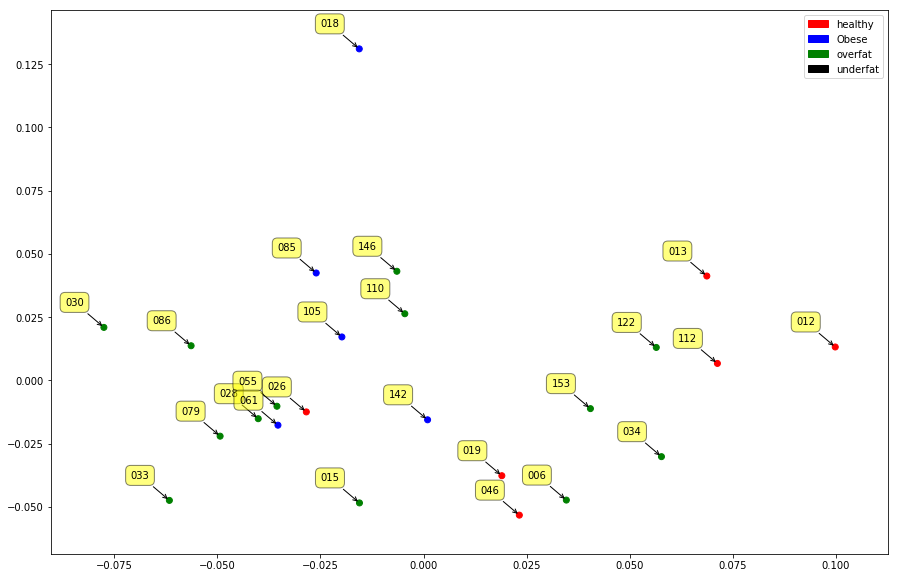

In [54]:
plt.rcParams["figure.figsize"] = [15,10]
fig = plt.figure()
ax = fig.add_subplot(111)
ax.scatter(x_out_h[:,0],x_out_h[:,1],c=colors,marker="o")

red_patch = mpatches.Patch(color='red', label='healthy')
green_patch = mpatches.Patch(color='green', label='overfat')
blue_patch = mpatches.Patch(color='blue', label='Obese')
black_patch = mpatches.Patch(color='black', label='underfat')
plt.legend(handles=[red_patch,blue_patch,green_patch,black_patch])


#ax.scatter(x_out[:,0],x_out[:,1],marker="o")



# for label, x, y in zip(np.array(ids)[fat_class], x_out[fat_class,7], x_out[fat_class,0]):
#     plt.annotate(
#         label,
#         xy=(x, y), xytext=(-20, 20),
#         textcoords='offset points', ha='right', va='bottom',
#         bbox=dict(boxstyle='round,pad=0.5', fc='yellow', alpha=0.5),
#         arrowprops=dict(arrowstyle = '->', connectionstyle='arc3,rad=0'))
    
# for label, x, y in zip(np.array(ids), x_out[:,0], x_out[:,1]):
#     plt.annotate(
#         label,
#         xy=(x, y), xytext=(-20, 20),
#         textcoords='offset points', ha='right', va='bottom',
#         bbox=dict(boxstyle='round,pad=0.5', fc='yellow', alpha=0.5),
#         arrowprops=dict(arrowstyle = '->', connectionstyle='arc3,rad=0'))

for label, x, y in zip(np.array(ids)[np.array(class_sexo_h)], x_out_h[:,0], x_out_h[:,1]):
    plt.annotate(
        label,
        xy=(x, y), xytext=(-20, 20),
        textcoords='offset points', ha='right', va='bottom',
        bbox=dict(boxstyle='round,pad=0.5', fc='yellow', alpha=0.5),
        arrowprops=dict(arrowstyle = '->', connectionstyle='arc3,rad=0'))


plt.legend(loc='best')

plt.show()

# Mujeres

In [55]:
id_sexo_f = {"f": True, "m": False}
class_sexo_f = map(lambda x: id_sexo_f.get(x[0]),sexo)

In [56]:
subset_mujeres = fetas_outl[np.array(class_sexo_f)]

In [57]:
del fetas_outl

In [58]:
pca_h = decomposition.PCA(n_components=35,svd_solver='randomized')
pca_h.fit(subset_mujeres)
print "Con n_components = {} el valor es: {} ".format(35,pca_h.explained_variance_ratio_.sum())

Con n_components = 35 el valor es: 0.77202275384 


In [59]:
import matplotlib.patches as mpatches


In [60]:
x_out_m = pca_h.transform(subset_mujeres)
x_out_m.shape

(88, 35)

In [61]:
data = pd.DataFrame(x_out_m)
#data["labels"]= bmis
data["labels"]= np.array(bmis)[np.array(class_sexo_f)]
color_wheel = {"healthy": "red", "obese": "blue","overfat":"green","underfat":"black","desconocido":"yellow"}
colors = data["labels"].map(lambda x: color_wheel.get(x.lower()))

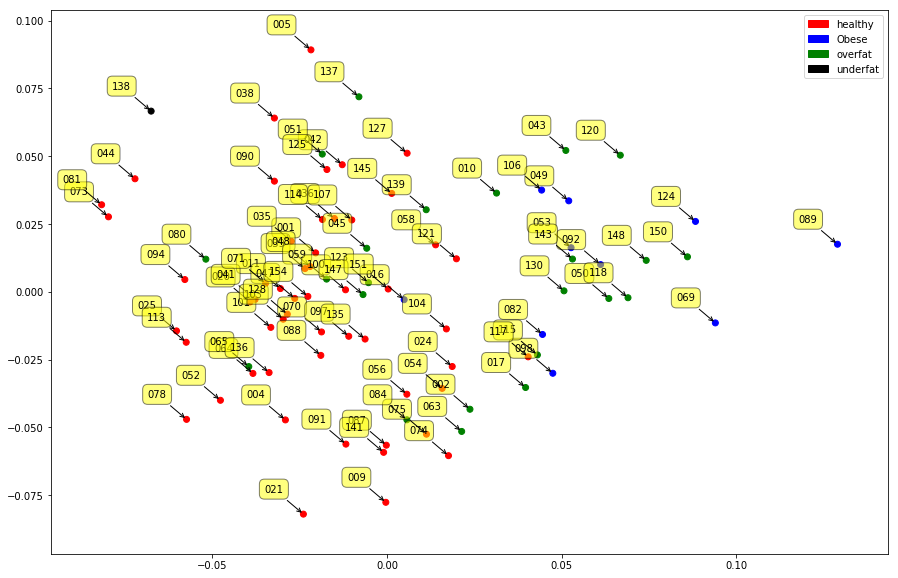

In [62]:
plt.rcParams["figure.figsize"] = [15,10]
fig = plt.figure()
ax = fig.add_subplot(111)
ax.scatter(x_out_m[:,0],x_out_m[:,1],c=colors,marker="o")

red_patch = mpatches.Patch(color='red', label='healthy')
green_patch = mpatches.Patch(color='green', label='overfat')
blue_patch = mpatches.Patch(color='blue', label='Obese')
black_patch = mpatches.Patch(color='black', label='underfat')
plt.legend(handles=[red_patch,blue_patch,green_patch,black_patch])


#ax.scatter(x_out[:,0],x_out[:,1],marker="o")



# for label, x, y in zip(np.array(ids)[fat_class], x_out[fat_class,7], x_out[fat_class,0]):
#     plt.annotate(
#         label,
#         xy=(x, y), xytext=(-20, 20),
#         textcoords='offset points', ha='right', va='bottom',
#         bbox=dict(boxstyle='round,pad=0.5', fc='yellow', alpha=0.5),
#         arrowprops=dict(arrowstyle = '->', connectionstyle='arc3,rad=0'))
    
# for label, x, y in zip(np.array(ids), x_out[:,0], x_out[:,1]):
#     plt.annotate(
#         label,
#         xy=(x, y), xytext=(-20, 20),
#         textcoords='offset points', ha='right', va='bottom',
#         bbox=dict(boxstyle='round,pad=0.5', fc='yellow', alpha=0.5),
#         arrowprops=dict(arrowstyle = '->', connectionstyle='arc3,rad=0'))

for label, x, y in zip(np.array(ids)[np.array(class_sexo_f)], x_out_m[:,0], x_out_m[:,1]):
    plt.annotate(
        label,
        xy=(x, y), xytext=(-20, 20),
        textcoords='offset points', ha='right', va='bottom',
        bbox=dict(boxstyle='round,pad=0.5', fc='yellow', alpha=0.5),
        arrowprops=dict(arrowstyle = '->', connectionstyle='arc3,rad=0'))

plt.legend(loc='best')

plt.show()

# Prediciendo

In [ ]:
import sklearn
from sklearn.svm import SVC

In [ ]:
id_bmi = {"healthy": 0, "obese": 1, "underfat":0, "overfat": 1}
bmi_c = data["labels"].map(lambda x: id_bmi.get(x)).tolist()

In [ ]:
X = x_out
y = bmi_c

In [ ]:
X_train, X_test, y_train, y_test = sklearn.model_selection.train_test_split( X, y, test_size=0.30, random_state=42)

In [ ]:
clf = SVC()
clf.fit(X_train, y_train) 

In [ ]:
clf.score(X_test,y_test)

In [ ]:
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.metrics import classification_report
clf = ExtraTreesClassifier(n_estimators=200,
                           max_features=0.3,
                           #max_depth=4, #20
                           random_state=1).fit(X_train, y_train)
y_pred = clf.predict(X_test)
print classification_report(y_test, y_pred)

In [ ]:
clf.score(X_test,y_test)

In [ ]:
from sklearn.model_selection import cross_val_score
scores = cross_val_score(clf, X, y, cv=5)

In [ ]:
scores.mean()

In [ ]:
scores.std()

In [ ]:
scores

## Clustering

In [ ]:
import time
from sklearn.cluster import MiniBatchKMeans, KMeans
from sklearn.metrics.pairwise import pairwise_distances_argmin
from sklearn.datasets.samples_generator import make_blobs

In [ ]:
k_means = KMeans(init='k-means++', n_clusters=2, n_init=1,precompute_distances=False,max_iter=300)
t0 = time.time()
k_means.fit(X)
t_batch = time.time() - t0

In [ ]:
n_clusters = 2

In [ ]:
fig = plt.figure(figsize=(8, 3))
#fig.subplots_adjust(left=0.02, right=0.98, bottom=0.05, top=0.9)
fig = plt.figure()
ax = fig.add_subplot(111)
colors1 = ['#4EACC5', '#FF9C34', '#4E9A06']

# We want to have the same colors for the same cluster from the
# MiniBatchKMeans and the KMeans algorithm. Let's pair the cluster centers per
# closest one.
k_means_cluster_centers = np.sort(k_means.cluster_centers_, axis=0)
#mbk_means_cluster_centers = np.sort(mbk.cluster_centers_, axis=0)
k_means_labels = pairwise_distances_argmin(X, k_means_cluster_centers)
#mbk_means_labels = pairwise_distances_argmin(X, mbk_means_cluster_centers)
#order = pairwise_distances_argmin(k_means_cluster_centers,
                                 # mbk_means_cluster_centers)

# KMeans
#ax = fig.add_subplot(1, 3, 1)
for k, col in zip(range(n_clusters), colors1):
    my_members = k_means_labels == k
    cluster_center = k_means_cluster_centers[k]
    ax.plot(X[my_members, 0], X[my_members, 1], 'w',
            markerfacecolor=col, marker='.', markersize=15)
    ax.plot(cluster_center[0], cluster_center[1], 'o', markerfacecolor=col,
            markeredgecolor='k', markersize=8)
ax.set_title('KMeans')
ax.set_xticks(())
ax.set_yticks(())
#plt.text(-3.5, 1.8,  'train time: %.2fs\ninertia: %f' % (
  #  t_batch, k_means.inertia_))
    
# for label, x, y in zip(np.array(ids), x_out[:,0], x_out[:,1]):
#     plt.annotate(
#         label,
#         xy=(x, y), xytext=(-20, 20),
#         textcoords='offset points', ha='right', va='bottom',
#         bbox=dict(boxstyle='round,pad=0.5', fc='yellow', alpha=0.5),
#         arrowprops=dict(arrowstyle = '->', connectionstyle='arc3,rad=0'))
    
plt.show()